### [ 7월 19일 스터디 ]
# 1, 2장 기반 데이터 분석 실습
## 세계 행복지수 분석

##### 
##### 
## 1. 데이터 불러오기 & 구조 확인

In [1]:
import numpy as np
import pandas as pd

In [2]:
happy_2022 = pd.read_csv('../data/2022.csv', encoding='utf-8')

In [3]:
happy_2022.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


##### 
* * *
##### 
##### 
## 2. 데이터에서 필요한 열만 추출 및 정리

In [4]:
happy_2022.drop(happy_2022.columns[[0, 3, 4]], axis = 1, inplace = True)

#데이터를 보기 쉽도록 Dystopia 열을 끝으로 보내기 위해서 데이터셋을 나눈 뒤 다시 병합
part1 = happy_2022.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8]]
part2 = happy_2022.iloc[:, [2]]
happy_2022 = pd.concat([part1, part2], axis = 1)

In [5]:
happy_2022.head()

,Country,Happiness score,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.83) + residual
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2.518
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2.226
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2.320
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,2.153
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2.137


##### 
* * *
##### 
##### 
## 3. 열이름 변경

In [6]:
#반복문으로 간단하게 처리하는 방법... 나중에 생각해보기
happy_2022.rename(columns = {happy_2022.columns[0] : '국가명',
                             happy_2022.columns[1] : '행복지수',
                             happy_2022.columns[2] : 'GDP',
                             happy_2022.columns[3] : '사회적 지원',
                             happy_2022.columns[4] : '기대수명',
                             happy_2022.columns[5] : '자율성',
                             happy_2022.columns[6] : '관용',
                             happy_2022.columns[7] : '부정부패',
                             happy_2022.columns[8] : '그 외'}, inplace = True)

In [7]:
happy_2022.head()

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2.518
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2.226
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2.320
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,2.153
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2.137


##### 
* * *
##### 
##### 
## 4. 2022년 행복지수 상위 및 하위 7개국의 수치 시각화 (+우리나라)

In [8]:
#우리나라의 데이터만
south_korea = happy_2022[happy_2022.국가명 == 'South Korea']
south_korea

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [9]:
#행복지수 상위 7개국 & 우리나라
happy_2022_top7 = happy_2022.loc[0:6]
happy_2022_top7 = pd.concat([happy_2022_top7, south_korea])
happy_2022_top7

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
0,Finland,7.821,1.892,1.258,0.775,0.736,0.109,0.534,2.518
1,Denmark,7.636,1.953,1.243,0.777,0.719,0.188,0.532,2.226
2,Iceland,7.557,1.936,1.320,0.803,0.718,0.270,0.191,2.320
3,Switzerland,7.512,2.026,1.226,0.822,0.677,0.147,0.461,2.153
4,Netherlands,7.415,1.945,1.206,0.787,0.651,0.271,0.419,2.137
5,Luxembourg*,7.404,2.209,1.155,0.790,0.700,0.120,0.388,2.042
6,Sweden,7.384,1.920,1.204,0.803,0.724,0.218,0.512,2.003
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [10]:
#행복지수 하위 7개국 & 우리나라
happy_2022_bottom7 = happy_2022.tail(7)
happy_2022_bottom7 = pd.concat([south_korea, happy_2022_bottom7])
happy_2022_bottom7

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656
139,Sierra Leone,3.574,0.686,0.416,0.273,0.387,0.202,0.055,1.556
140,Lesotho*,3.512,0.839,0.848,0.000,0.419,0.076,0.018,1.312
141,Botswana*,3.471,1.503,0.815,0.280,0.571,0.012,0.102,0.187
142,Rwanda*,3.268,0.785,0.133,0.462,0.621,0.187,0.544,0.536
143,Zimbabwe,2.995,0.947,0.690,0.270,0.329,0.106,0.105,0.548
144,Lebanon,2.955,1.392,0.498,0.631,0.103,0.082,0.034,0.216
145,Afghanistan,2.404,0.758,0.000,0.289,0.000,0.089,0.005,1.263


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [12]:
#코드 작성의 편리함을 위해 변수 선언
happy_2022_top7 = happy_2022_top7.sort_index(ascending = False)

top_name = happy_2022_top7['국가명']
top1 = happy_2022_top7['GDP']
top2 = happy_2022_top7['사회적 지원']
top3 = happy_2022_top7['기대수명']
top4 = happy_2022_top7['자율성']
top5 = happy_2022_top7['관용']
top6 = happy_2022_top7['부정부패']
top7 = happy_2022_top7['그 외']

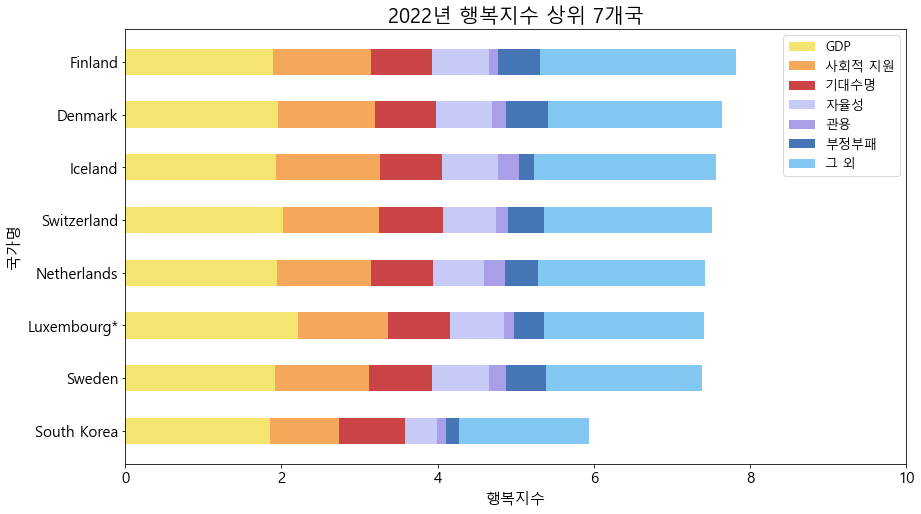

In [13]:
#누적막대그래프(가로) 그리기
plt.figure(figsize = (14, 8))

#left 왼쪽에서부터 쌓는다!
plt.barh(top_name, top1, height = 0.5, label = 'GDP', color = '#F6E471')
plt.barh(top_name, top2, height = 0.5, left = top1, label = '사회적 지원', color = '#F5A75A')
plt.barh(top_name, top3, height = 0.5, left = top1 + top2, label = '기대수명', color = '#CB4445')
plt.barh(top_name, top4, height = 0.5, left = top1 + top2 + top3, label = '자율성', color = '#C7CAF7')
plt.barh(top_name, top5, height = 0.5, left = top1 + top2 + top3 + top4, label = '관용', color = '#A99EE8')
plt.barh(top_name, top6, height = 0.5, left = top1 + top2 + top3 + top4 + top5, label = '부정부패', color = '#4575B4')
plt.barh(top_name, top7, height = 0.5, left = top1 + top2 + top3 + top4 + top5 + top6, label = '그 외', color = '#83C8F2')

#제목, 축 이름, 축 범위, 범례 설정
plt.title('2022년 행복지수 상위 7개국', fontsize = 20)
plt.xlabel('행복지수', fontsize = 15)
plt.ylabel('국가명', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([0, 10])
plt.legend(fontsize = 13)

plt.show()

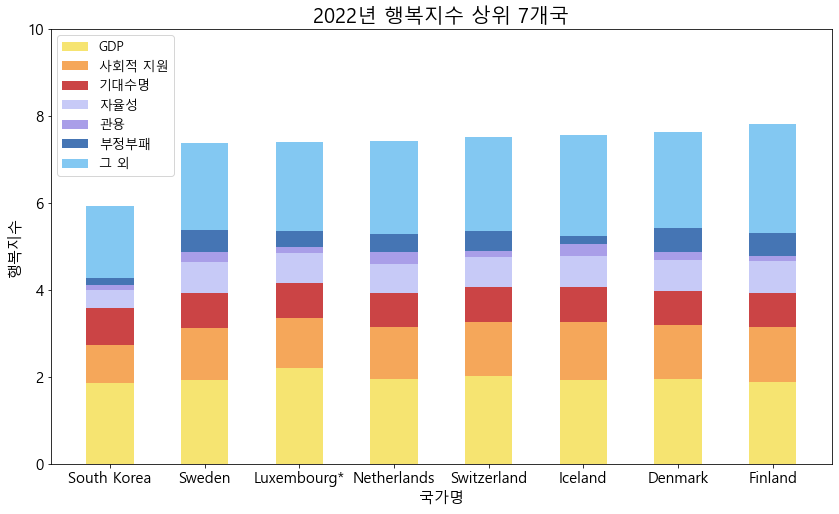

In [44]:
plt.figure(figsize = (14, 8))

plt.bar(top_name, top1, width = 0.5, label = 'GDP', color = '#F6E471')
plt.bar(top_name, top2, width = 0.5, bottom = top1, label = '사회적 지원', color = '#F5A75A')
plt.bar(top_name, top3, width = 0.5, bottom = top1 + top2, label = '기대수명', color = '#CB4445')
plt.bar(top_name, top4, width = 0.5, bottom = top1 + top2 + top3, label = '자율성', color = '#C7CAF7')
plt.bar(top_name, top5, width = 0.5, bottom = top1 + top2 + top3 + top4, label = '관용', color = '#A99EE8')
plt.bar(top_name, top6, width = 0.5, bottom = top1 + top2 + top3 + top4 + top5, label = '부정부패', color = '#4575B4')
plt.bar(top_name, top7, width = 0.5, bottom = top1 + top2 + top3 + top4 + top5 + top6, label = '그 외', color = '#83C8F2')

plt.title('2022년 행복지수 상위 7개국', fontsize = 20)
plt.xlabel('국가명', fontsize = 15)
plt.ylabel('행복지수', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0, 10])
plt.legend(fontsize = 13)

plt.show()

In [14]:
bot_name = happy_2022_bottom7['국가명']
bot1 = happy_2022_bottom7['GDP']
bot2 = happy_2022_bottom7['사회적 지원']
bot3 = happy_2022_bottom7['기대수명']
bot4 = happy_2022_bottom7['자율성']
bot5 = happy_2022_bottom7['관용']
bot6 = happy_2022_bottom7['부정부패']
bot7 = happy_2022_bottom7['그 외']

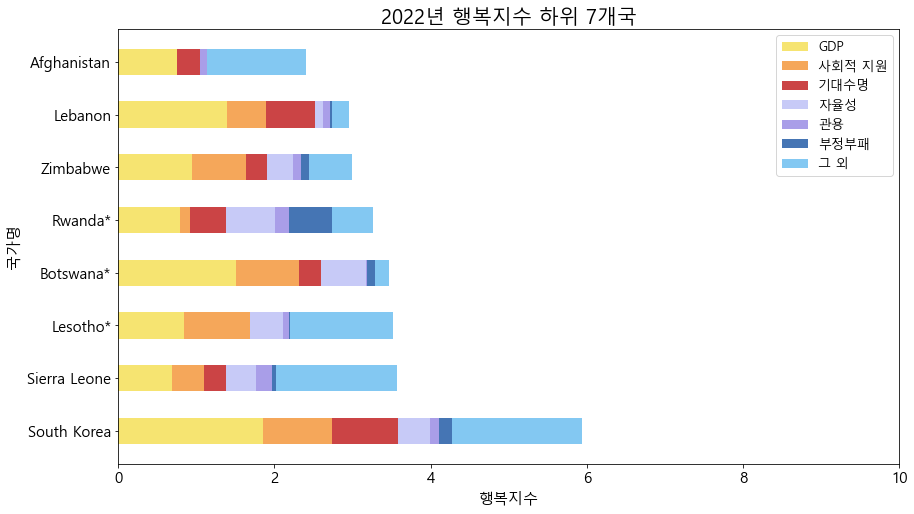

In [15]:
plt.figure(figsize = (14, 8))

plt.barh(bot_name, bot1, height = 0.5, label = 'GDP', color = '#F6E471')
plt.barh(bot_name, bot2, height = 0.5, left = bot1, label = '사회적 지원', color = '#F5A75A')
plt.barh(bot_name, bot3, height = 0.5, left = bot1 + bot2, label = '기대수명', color = '#CB4445')
plt.barh(bot_name, bot4, height = 0.5, left = bot1 + bot2 + bot3, label = '자율성', color = '#C7CAF7')
plt.barh(bot_name, bot5, height = 0.5, left = bot1 + bot2 + bot3 + bot4, label = '관용', color = '#A99EE8')
plt.barh(bot_name, bot6, height = 0.5, left = bot1 + bot2 + bot3 + bot4 + bot5, label = '부정부패', color = '#4575B4')
plt.barh(bot_name, bot7, height = 0.5, left = bot1 + bot2 + bot3 + bot4 + bot5 + bot6, label = '그 외', color = '#83C8F2')

#제목, 축 이름, 축 범위, 범례 설정
plt.title('2022년 행복지수 하위 7개국', fontsize = 20)
plt.xlabel('행복지수', fontsize = 15)
plt.ylabel('국가명', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([0, 10])
plt.legend(fontsize = 13)

plt.show()

##### 
* * *
##### 
##### 
## 5. 2022년 우리나라와 전세계 평균 행복지수 시각화

In [16]:
#최적의 대푯값을 확인하기 위해 데이터 요약
happy_2022.describe()

,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808
std,1.086843,0.421663,0.280122,0.176336,0.145859,0.082799,0.127514,0.534994
min,2.404000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187000
25%,4.888750,1.095500,0.732000,0.463250,0.440500,0.089000,0.068250,1.555250
50%,5.568500,1.445500,0.957500,0.621500,0.543500,0.132500,0.119500,1.894500
75%,6.305000,1.784750,1.114250,0.719750,0.626000,0.197750,0.198500,2.153000
max,7.821000,2.209000,1.320000,0.942000,0.740000,0.468000,0.587000,2.844000


In [17]:
#항목별 평균 데이터 추출
happy_2022_mean = happy_2022.drop(happy_2022.columns[0], axis = 1).mean()
happy_2022_mean = pd.DataFrame(happy_2022_mean).T
happy_2022_mean.insert(0, '국가명', '평균')
happy_2022_mean

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
0,평균,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808


In [18]:
happy_2022_ms = pd.concat([south_korea, happy_2022_mean], axis = 0)
happy_2022_ms

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
58,South Korea,5.935000,1.851000,0.886000,0.841000,0.414000,0.111000,0.176000,1.656000
0,평균,5.553575,1.410445,0.905863,0.586171,0.517226,0.147377,0.154781,1.831808


In [19]:
ms_name = happy_2022_ms['국가명']
ms1 = happy_2022_ms['GDP']
ms2 = happy_2022_ms['사회적 지원']
ms3 = happy_2022_ms['기대수명']
ms4 = happy_2022_ms['자율성']
ms5 = happy_2022_ms['관용']
ms6 = happy_2022_ms['부정부패']
ms7 = happy_2022_ms['그 외']

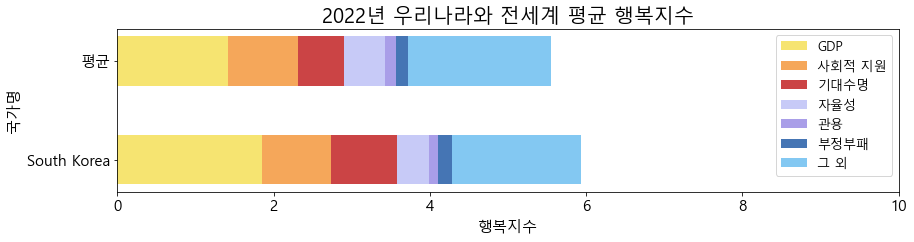

In [20]:
plt.figure(figsize = (14, 3))

plt.barh(ms_name, ms1, height = 0.5, label = 'GDP', color = '#F6E471')
plt.barh(ms_name, ms2, height = 0.5, left = ms1, label = '사회적 지원', color = '#F5A75A')
plt.barh(ms_name, ms3, height = 0.5, left = ms1 + ms2, label = '기대수명', color = '#CB4445')
plt.barh(ms_name, ms4, height = 0.5, left = ms1 + ms2 + ms3, label = '자율성', color = '#C7CAF7')
plt.barh(ms_name, ms5, height = 0.5, left = ms1 + ms2 + ms3 + ms4, label = '관용', color = '#A99EE8')
plt.barh(ms_name, ms6, height = 0.5, left = ms1 + ms2 + ms3 + ms4 + ms5, label = '부정부패', color = '#4575B4')
plt.barh(ms_name, ms7, height = 0.5, left = ms1 + ms2 + ms3 + ms4 + ms5 + ms6, label = '그 외', color = '#83C8F2')

#제목, 축 이름, 축 범위, 범례 설정
plt.title('2022년 우리나라와 전세계 평균 행복지수', fontsize = 20)
plt.xlabel('행복지수', fontsize = 15)
plt.ylabel('국가명', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim([0, 10])
plt.legend(fontsize = 13)

plt.show()

##### 
* * *
##### 
##### 
## 6. 항목별 우리나라의 순위

In [21]:
#행복지수 순위(총 146개국)
happy_2022[happy_2022.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
58,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [22]:
#GDP 순위
happy_2022_GDP = happy_2022.sort_values(by = 'GDP', ascending = False).reset_index(drop = True) #인덱스 초기화
happy_2022_GDP[happy_2022_GDP.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
25,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [23]:
#사회적 지원 순위
happy_2022_support = happy_2022.sort_values(by = '사회적 지원', ascending = False).reset_index(drop = True)
happy_2022_support[happy_2022_support.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
84,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [24]:
#기대수명 순위
happy_2022_life = happy_2022.sort_values(by = '기대수명', ascending = False).reset_index(drop = True)
happy_2022_life[happy_2022_life.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
3,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [25]:
#자율성 순위
happy_2022_freedom = happy_2022.sort_values(by = '자율성', ascending = False).reset_index(drop = True)
happy_2022_freedom[happy_2022_freedom.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
112,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [26]:
#부정부패 순위
happy_2022_corruption = happy_2022.sort_values(by = '부정부패', ascending = False).reset_index(drop = True)
happy_2022_corruption[happy_2022_corruption.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
45,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


In [27]:
#그 외 항목 순위
happy_2022_etc = happy_2022.sort_values(by = '그 외', ascending = False).reset_index(drop = True)
happy_2022_etc[happy_2022_etc.국가명 == 'South Korea']

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외
100,South Korea,5.935,1.851,0.886,0.841,0.414,0.111,0.176,1.656


##### 
* * *
##### 
##### 
## 7. 2016 ~ 2022년 우리나라 행복지수 추이

In [28]:
#2016 ~ 2021년 데이터 불러오기
happy_2016 = pd.read_csv('../data/2016.csv', encoding='utf-8')
happy_2017 = pd.read_csv('../data/2017.csv', encoding='utf-8')
happy_2018 = pd.read_csv('../data/2018.csv', encoding='utf-8')
happy_2019 = pd.read_csv('../data/2019.csv', encoding='utf-8')
happy_2020 = pd.read_csv('../data/2020.csv', encoding='utf-8')
happy_2021 = pd.read_csv('../data/2021.csv', encoding='utf-8')

In [29]:
#필요한 열만 추출
happy_2016 = happy_2016.iloc[:, [0, 3]]
happy_2017 = happy_2017.iloc[:, [0, 2]]
happy_2018 = happy_2018.iloc[:, [1, 2]]
happy_2019 = happy_2019.iloc[:, [1, 2]]
happy_2020 = happy_2020.iloc[:, [0, 2]]
happy_2021 = happy_2021.iloc[:, [0, 2]]
happy_2022_1 = happy_2022.iloc[:, [0, 1]]

In [30]:
#열 이름 변경
happy_2016.rename(columns = {happy_2016.columns[0] : '국가명', happy_2016.columns[1] : '행복지수'}, inplace = True)
happy_2017.rename(columns = {happy_2017.columns[0] : '국가명', happy_2017.columns[1] : '행복지수'}, inplace = True)
happy_2018.rename(columns = {happy_2018.columns[0] : '국가명', happy_2018.columns[1] : '행복지수'}, inplace = True)
happy_2019.rename(columns = {happy_2019.columns[0] : '국가명', happy_2019.columns[1] : '행복지수'}, inplace = True)
happy_2020.rename(columns = {happy_2020.columns[0] : '국가명', happy_2020.columns[1] : '행복지수'}, inplace = True)
happy_2021.rename(columns = {happy_2021.columns[0] : '국가명', happy_2021.columns[1] : '행복지수'}, inplace = True)

In [31]:
#우리나라 데이터만 추출
happy_2016_ko = happy_2016[happy_2016.국가명 == 'South Korea']
happy_2017_ko = happy_2017[happy_2017.국가명 == 'South Korea']
happy_2018_ko = happy_2018[happy_2018.국가명 == 'South Korea']
happy_2019_ko = happy_2019[happy_2019.국가명 == 'South Korea']
happy_2020_ko = happy_2020[happy_2020.국가명 == 'South Korea']
happy_2021_ko = happy_2021[happy_2021.국가명 == 'South Korea']
happy_2022_ko = happy_2022_1[happy_2022_1.국가명 == 'South Korea']

In [32]:
#concat 함수로 병합해서 데이터 프레임 생성
happy_korea = pd.concat([happy_2016_ko, happy_2017_ko, happy_2018_ko, happy_2019_ko, happy_2020_ko, happy_2021_ko, happy_2022_ko])
happy_korea['연도'] = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
happy_korea

,국가명,행복지수,연도
57,South Korea,5.8350,2016
54,South Korea,5.8380,2017
56,South Korea,5.8750,2018
53,South Korea,5.8950,2019
60,South Korea,5.8724,2020
61,South Korea,5.8450,2021
58,South Korea,5.9350,2022


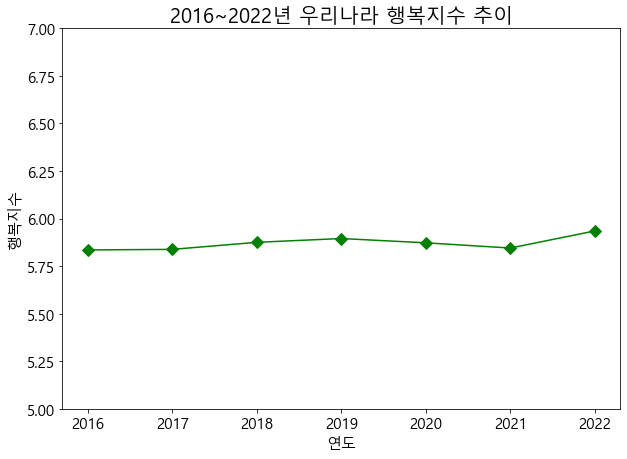

In [33]:
plt.figure(figsize = (10, 7))

plt.plot(happy_korea['연도'], happy_korea['행복지수'], marker = 'D', markersize = 8, color = 'green')

plt.title('2016~2022년 우리나라 행복지수 추이', fontsize = 20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('행복지수', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([5, 7])

plt.show()

###### 
### +) 2020 ~ 2022년 우리나라 행복지수 및 항목별 추이

In [34]:
#앞에서 했던 거 그대로~
happy_2020 = pd.read_csv('../data/2020.csv', encoding='utf-8')
happy_2021 = pd.read_csv('../data/2021.csv', encoding='utf-8')

happy_2020 = happy_2020.iloc[:, [0, 2, 13, 14, 15, 16, 17, 18, 19]]
happy_2021 = happy_2021.iloc[:, [0, 2, 13, 14, 15, 16, 17, 18, 19]]

happy_2020.rename(columns = {happy_2020.columns[0] : '국가명',
                             happy_2020.columns[1] : '행복지수',
                             happy_2020.columns[2] : 'GDP',
                             happy_2020.columns[3] : '사회적 지원',
                             happy_2020.columns[4] : '기대수명',
                             happy_2020.columns[5] : '자율성',
                             happy_2020.columns[6] : '관용',
                             happy_2020.columns[7] : '부정부패',
                             happy_2020.columns[8] : '그 외'}, inplace = True)

happy_2021.rename(columns = {happy_2021.columns[0] : '국가명',
                             happy_2021.columns[1] : '행복지수',
                             happy_2021.columns[2] : 'GDP',
                             happy_2021.columns[3] : '사회적 지원',
                             happy_2021.columns[4] : '기대수명',
                             happy_2021.columns[5] : '자율성',
                             happy_2021.columns[6] : '관용',
                             happy_2021.columns[7] : '부정부패',
                             happy_2021.columns[8] : '그 외'}, inplace = True)

In [35]:
happy_2020_korea = happy_2020[happy_2020.국가명 == 'South Korea']
happy_2021_korea = happy_2021[happy_2021.국가명 == 'South Korea']
happy_2022_korea = happy_2022[happy_2022.국가명 == 'South Korea']

In [36]:
happy_korea = pd.concat([happy_2020_korea, happy_2021_korea, happy_2022_korea])
happy_korea['연도'] = [2020, 2021, 2022]
happy_korea

,국가명,행복지수,GDP,사회적 지원,기대수명,자율성,관용,부정부패,그 외,연도
60,South Korea,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596,1.946757,2020
61,South Korea,5.8450,1.403000,0.758000,0.801000,0.353000,0.134000,0.135000,2.262000,2021
58,South Korea,5.9350,1.851000,0.886000,0.841000,0.414000,0.111000,0.176000,1.656000,2022


In [37]:
ko_year = happy_korea['연도']
ko1 = happy_korea['행복지수']
ko2 = happy_korea['GDP']
ko3 = happy_korea['사회적 지원']
ko4 = happy_korea['기대수명']
ko5 = happy_korea['자율성']
ko6 = happy_korea['관용']
ko7 = happy_korea['부정부패']
ko8 = happy_korea['그 외']

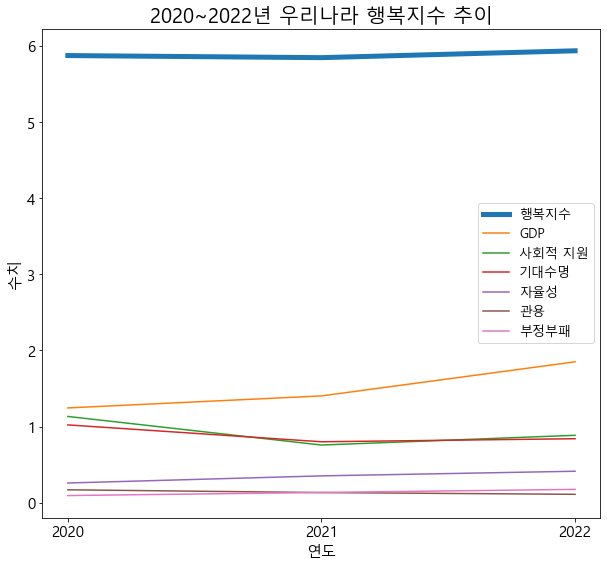

In [38]:
plt.figure(figsize = (10, 9))

plt.plot(ko_year, ko1, lw = 5, label = '행복지수')
plt.plot(ko_year, ko2, label = 'GDP')
plt.plot(ko_year, ko3, label = '사회적 지원')
plt.plot(ko_year, ko4, label = '기대수명')
plt.plot(ko_year, ko5, label = '자율성')
plt.plot(ko_year, ko6, label = '관용')
plt.plot(ko_year, ko7, label = '부정부패')

plt.title('2020~2022년 우리나라 행복지수 추이', fontsize = 20)
plt.xlabel('연도', fontsize = 15)
plt.ylabel('수치', fontsize = 15)
plt.xticks([2020, 2021, 2022], fontsize = 15) #눈금을 적용할 x축 위치 지정
plt.yticks(fontsize = 15)
plt.legend(fontsize = 13)

plt.show()

##### 
* * *
##### 
##### 
## 8. 행복지수와 항목별 상관관계

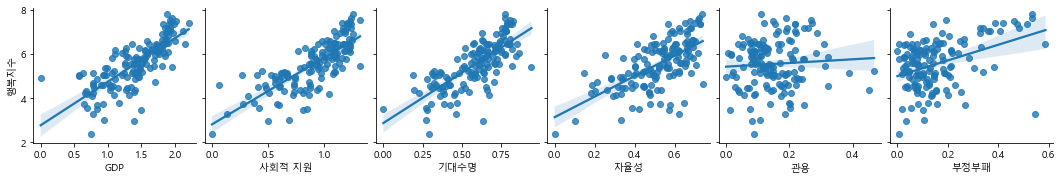

In [39]:
sns.pairplot(happy_2022, x_vars = ['GDP', '사회적 지원', '기대수명', '자율성', '관용', '부정부패'], 
             y_vars = ['행복지수'], kind = 'reg')
plt.show()

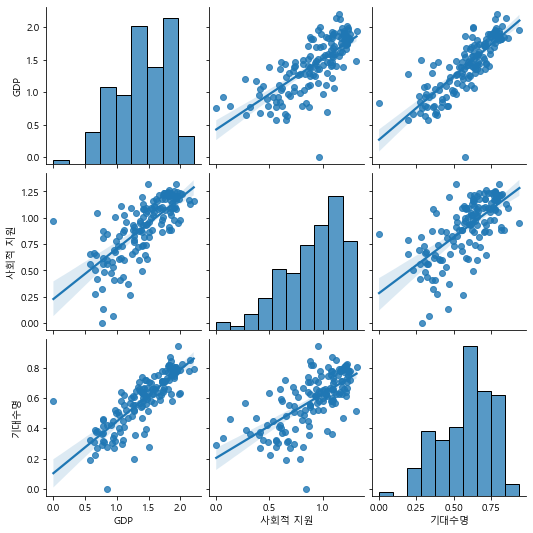

In [40]:
sns.pairplot(happy_2022, vars = ['GDP', '사회적 지원', '기대수명'], kind = 'reg')
plt.show()